In [1]:
!pip install face_recognition opencv-python-headless


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=affb00549a9d40f61e387ff0c6e64a0666fd27a4957e97733a883088c73f5fc3
  Stored in directory: /root/.cache/pip/wheels/8f/47/c8/f44c5aebb7507f7c8a2c0bd23151d732d0f0bd6884ad4ac635
Successfully built face-recognition-models


In [16]:
import face_recognition
import os
import pickle

DATASET_PATH = "data/known_faces"
ENCODINGS_FILE = "data/encodings.pickle"

known_encodings = []
known_names = []

for person_name in os.listdir(DATASET_PATH):
    person_folder = os.path.join(DATASET_PATH, person_name)

    if not os.path.isdir(person_folder):
        continue

    for img_name in os.listdir(person_folder):
        img_path = os.path.join(person_folder, img_name)

        image = face_recognition.load_image_file(img_path)
        encodings = face_recognition.face_encodings(image)

        if encodings:
            known_encodings.append(encodings[0])
            known_names.append(person_name)

# Save encodings to file
data = {
    "encodings": known_encodings,
    "names": known_names
}

with open(ENCODINGS_FILE, "wb") as f:
    pickle.dump(data, f)

print("✅ Face registration completed")
print("Total faces registered:", len(known_names))


✅ Face registration completed
Total faces registered: 3


In [17]:
import pickle

with open("data/encodings.pickle", "rb") as f:
    data = pickle.load(f)

known_encodings = data["encodings"]
known_names = data["names"]

print("Loaded identities:", set(known_names))


Loaded identities: {'Aishwarya', 'Deepika', 'Tiger'}


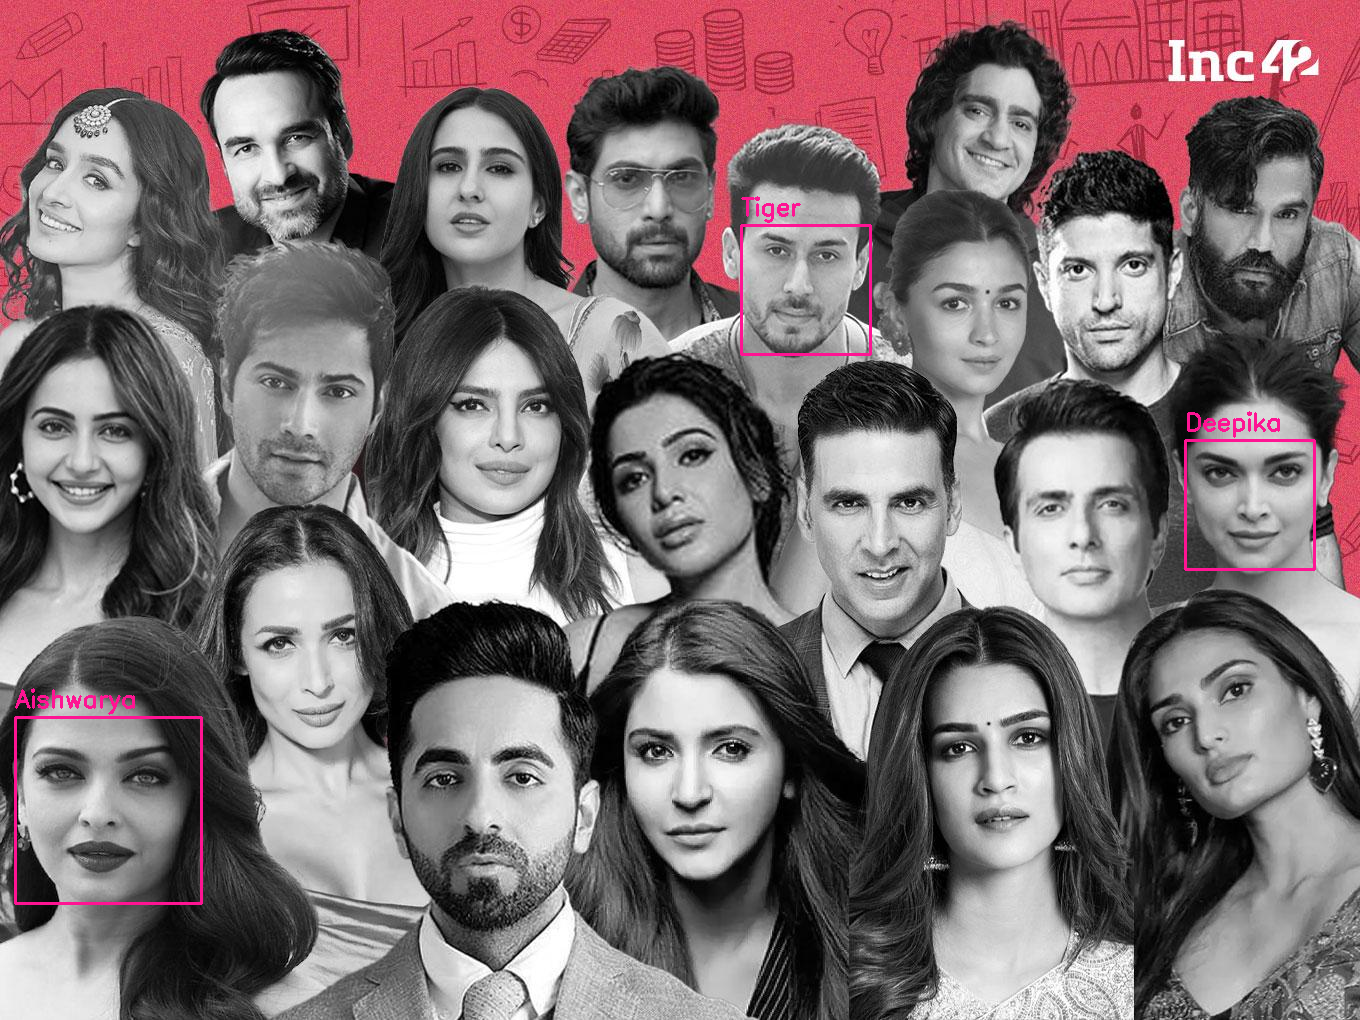

In [18]:
import cv2
import face_recognition
from google.colab.patches import cv2_imshow

PINK = (147, 20, 255)

image = cv2.imread("output.jpg")
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

face_locations = face_recognition.face_locations(rgb_image)
face_encodings = face_recognition.face_encodings(rgb_image, face_locations)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):

    distances = face_recognition.face_distance(known_encodings, face_encoding)
    best_match = distances.argmin()

    if distances[best_match] > 0.5:
        continue   # skip unknown

    name = known_names[best_match]

    cv2.rectangle(image, (left, top), (right, bottom), PINK, 2)
    cv2.putText(
        image,
        name,
        (left, top - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.8,
        PINK,
        2
    )

cv2_imshow(image)
